In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/MyDrive/Grad project'

/content/drive/MyDrive/Grad project


In [ ]:
pip install --upgrade pip setuptools wheel

     |████████████████████████████████| 1.6MB 15.8MB/s 
     |████████████████████████████████| 788kB 53.0MB/s 
Requirement already up-to-date: wheel in /usr/local/lib/python3.7/dist-packages (0.36.2)
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Found existing installation: setuptools 56.1.0
    Uninstalling setuptools-56.1.0:
      Successfully uninstalled setuptools-56.1.0


In [ ]:
!apt-get install -y swig libpulse-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libpulse-mainloop-glib0 swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  libpulse-dev libpulse-mainloop-glib0 swig swig3.0
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,204 kB of archives.
After this operation, 6,540 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpulse-mainloop-glib0 amd64 1:11.1-1ubuntu7.11 [22.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpulse-dev amd64 1:11.1-1ubuntu7.11 [81.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:4 http

In [ ]:
pip install SpeechRecognition

     |████████████████████████████████| 32.8 MB 47 kB/s 


In [ ]:
pip install moviepy

In [ ]:
pip install pydub

In [ ]:
pip install ffmpeg-python

In [ ]:
pip install python-Levenshtein

     |████████████████████████████████| 50 kB 3.3 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149855 sha256=70ef4afc8dd2379087cc73ab721bd422da4f77ba48f47925be80636c6cc5e418
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
pip install Distance

     |████████████████████████████████| 180 kB 13.1 MB/s 
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16260 sha256=a97b77959b872eea3a587afc6d9df468e4d80c60aba38764a50b056461bbe57b
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built Distance


In [ ]:
pip install fuzzywuzzy

Presentation Pace Testing

In [ ]:
import speech_recognition as sr
import numpy
from moviepy.editor import *
import io
#video to audio
#clip = VideoFileClip("Is Your Inner Genius Being Heard Find Your Fire Pete Lonton  TEDxDerryLondonderry.mp4")
#
#clip.audio.write_audiofile("Audio File1.wav")
from os import path

from pydub import AudioSegment
from pydub.playback import play
from pydub.silence import split_on_silence
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

for i in range(1,51):
  subtitle = "Subtitle "+str(i)+".txt"
  audiof = "Audio "+str(i)+".wav"

  with open(subtitle, 'r') as file:
      data = file.read().replace("\n", " ")
  sound = AudioSegment.from_wav(audiof)


  chunks = split_on_silence(sound, 
      # must be silent for at least half a second
      min_silence_len=500,

      # consider it silent if quieter than -16 dBFS
      silence_thresh=-50
  )

  r = sr.Recognizer()
  ans=""
  print(len(chunks))
  words=1
  for x in chunks:
    b = io.BytesIO()
    x.export(b,format='wav')
    b.seek(0)
    with sr.AudioFile(b) as source:
        audio = r.record(source)  # read the entire audio file
    try:
        # for testing purposes, we're just using the default API key
        # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
        # instead of `r.recognize_google(audio)`
        ans += " "+ r.recognize_google(audio,language='en-US')
        for x in ans:
          if (x.isspace()) == True: 
            words+=1
    except sr.UnknownValueError:
      continue
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

  partial_score = fuzz.ratio(data, ans)
  token_score = fuzz.token_set_ratio(data, ans)
  print(i, " :  ",partial_score ," ", token_score)
  subtitle=subtitle.replace(str(i),str(i+1))
  audiof=audiof.replace(str(i),str(i+1))
#15  :   89   93
#15  :   91   96

169
1  :   90   94
144
2  :   88   92
111
3  :   89   97
106
4  :   89   93
74
5  :   91   94
159
6  :   95   95
145
7  :   89   95
70
8  :   88   98
158
9  :   91   94
219
10  :   83   86
66
11  :   83   93
70
12  :   75   94
189
13  :   89   96
96
14  :   90   93
112
15  :   92   96
73
16  :   92   96
100
17  :   93   97
114
18  :   92   95
48
19  :   71   86
153
20  :   92   95
41
21  :   87   98
107
22  :   87   97
19
23  :   95   99
202
24  :   95   96
211
25  :   89   94
122
Could not request results from Google Speech Recognition service; recognition request failed: Bad Request
26  :   66   94
67
27  :   70   85
214
28  :   90   95
161
29  :   85   94
126
30  :   47   86
273
31  :   81   88
29
32  :   86   89
2
Could not request results from Google Speech Recognition service; recognition connection failed: [Errno 32] Broken pipe
33  :   0   0
166
34  :   90   93
82
35  :   85   91
2
Could not request results from Google Speech Recognition service; recognition connection failed: 

Presentation Pace

In [50]:
import speech_recognition as sr
import numpy
import io
from pydub import AudioSegment
from pydub.playback import play
from pydub.silence import split_on_silence
#clip = mp.VideoFileClip("Is Your Inner Genius Being Heard Find Your Fire Pete Lonton  TEDxDerryLondonderry.mp4")
#clip.audio.write_audiofile("Audio 1.wav")

# obtain path to "english.wav" in the same folder as this script

from os import path
AUDIO_FILE = "Audio 1.wav"
# AUDIO_FILE = path.join(path.dirname(path.realpath(__file__)), "french.aiff")
# AUDIO_FILE = path.join(path.dirname(path.realpath(__file__)), "chinese.flac")
#
# # use the audio file as the audio source
# pDetection = aubio.pitch("default", 2048,2048//2, 44100)
 # Set unit.
# pDetection.set_unit("Hz")
# pDetection.set_silence(-40)

sound = AudioSegment.from_wav(AUDIO_FILE)

chunks = split_on_silence(sound, 
    # must be silent for at least half a second
    min_silence_len=500,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-50
)

r = sr.Recognizer()
ans=""
words=1
for x in chunks:
  b = io.BytesIO()
  x.export(b,format='wav')
  b.seek(0)
  with sr.AudioFile(b) as source:
      audio = r.record(source)  # read the entire audio file
  try:
      # for testing purposes, we're just using the default API key
      # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
      # instead of `r.recognize_google(audio)`
      ans += " "+ r.recognize_google(audio,language='en-US')
      words+=len(ans.split())
  except sr.UnknownValueError:
    continue
  except sr.RequestError as e:
      print("Could not request results from Google Speech Recognition service; {0}".format(e))



Adequate Voice OUTPUT

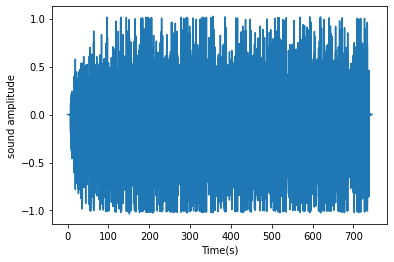

count: 99.9604466097637


In [51]:
import librosa as lp
import matplotlib.pyplot as plt
import numpy as np
y,freq=lp.load(r"Audio 1.wav")

#print(y,freq)
#print(max(y))
time = np.arange(0,len(y))/freq
#print(len(time))
fig, ax = plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()
lp.get_duration(y,freq)

#print(len(y))

# Thresh hold 
count=0
arr= y <= max(y)*(3/4)
for x in arr:
  if(x):
    count+=x
print("count: "+str(count/len(y)*100))

Presentation pace OUTPUT

In [49]:
import math
# represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows. 
# This function returns a complex-valued matrix D such that.
S = lp.stft(y)
# np.abs(D[f, t]) is the magnitude of frequency bin f at frame t, and

# allDB = lp.amplitude_to_db(np.abs(S),ref=np.max)
allDB = lp.amplitude_to_db(np.abs(S))
test = lp.effects.split(y, top_db=20)
yt, index = lp.effects.trim(y,top_db=20)
audio_time_without_silance = math.ceil(lp.get_duration(yt))
average = words/audio_time_without_silance
print(str(math.ceil(average))+ " WPM")
if (average>=150):
  print("You talking too fast.")
elif (average>=120 and average <=150):
  print("Perfect WPM.")
elif (average <120):
  print("You talking very slow.")

134 WPM
Perfect WPM.
